# Overview

1. Understanding the data 
2. Feature engineering
3. Model Preprocessing
4. Model Building

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
qsar = pd.read_csv('biodeg.csv', sep=';')
qsar.columns = qsar.columns.str.replace('(', '').str.replace(')', '').str.replace('[','').str.replace(']','').str.replace('-','')
# Replacing NRB and RB to 0 and 1 for easy interpretation
qsar['experimental_class'] = qsar['experimental_class'].replace(['NRB'], '0').replace(['RB'], '1')
qsar['experimental_class'] = qsar['experimental_class'].astype(int)

# Understanding the data

1. head(), info(), describe()
2. Spliting data into continuous and categorical variables
3. Histogram for continuous variables
4. Bar chart for categorical variables

In [3]:
qsar.head(10)

,SpMax_L,J_Dze,nHM,F01NN,F04CN,NssssC,nCb,C%,nCp,nO,...,C026,F02CN,nHDon,SpMax_Bm,Psi_i_A,nN,SM6_Bm,nArCOOR,nX,experimental_class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,1
5,4.236,3.4286,0,0,0,0,0,28.6,2,4,...,0,0,0,3.351,2.556,0,7.904,0,0,1
6,5.000,5.0476,1,0,0,0,0,11.1,0,3,...,0,0,1,4.712,4.583,0,9.303,0,0,1
7,4.525,3.8301,0,0,0,0,0,31.6,3,2,...,0,0,0,3.379,2.143,0,7.950,0,0,1
8,4.596,3.0777,0,0,0,0,2,44.4,2,0,...,0,0,0,3.626,1.917,0,7.939,0,0,1
9,5.040,3.6112,0,0,1,0,2,41.2,0,4,...,1,2,1,3.888,3.500,1,8.706,0,0,1


In [4]:
qsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1055 non-null   float64
 1   J_Dze               1055 non-null   float64
 2   nHM                 1055 non-null   int64  
 3   F01NN               1055 non-null   int64  
 4   F04CN               1055 non-null   int64  
 5   NssssC              1055 non-null   int64  
 6   nCb                 1055 non-null   int64  
 7   C%                  1055 non-null   float64
 8   nCp                 1055 non-null   int64  
 9   nO                  1055 non-null   int64  
 10  F03CN               1055 non-null   int64  
 11  SdssC               1055 non-null   float64
 12  HyWi_Bm             1055 non-null   float64
 13  LOC                 1055 non-null   float64
 14  SM6_L               1055 non-null   float64
 15  F03CO               1055 non-null   int64  
 16  Me    

In [5]:
qsar.describe()

,SpMax_L,J_Dze,nHM,F01NN,F04CN,NssssC,nCb,C%,nCp,nO,...,C026,F02CN,nHDon,SpMax_Bm,Psi_i_A,nN,SM6_Bm,nArCOOR,nX,experimental_class
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,...,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223,0.337441
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,...,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286,0.473061
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,...,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000,1.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000,1.000000


In [6]:
qsar.experimental_class.value_counts()

0    699
1    356
Name: experimental_class, dtype: int64

In [7]:
# Spliting columns to categorical and continuous variables 
qsar_cat = qsar.select_dtypes(include='int64')  # total 24 columns
qsar_con = qsar.select_dtypes(include='float64')  # total 17 columns

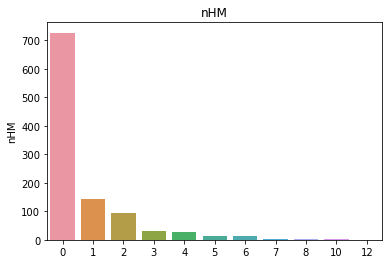

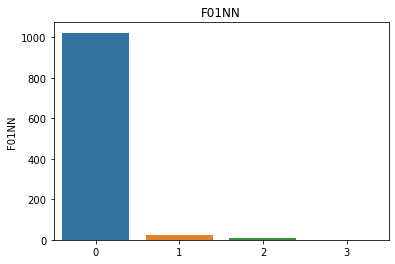

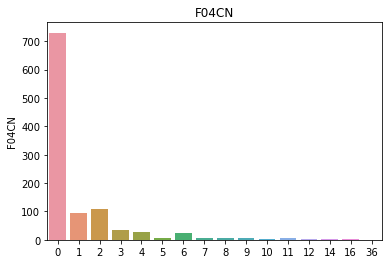

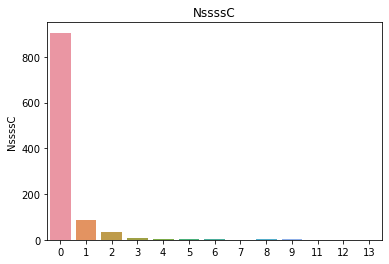

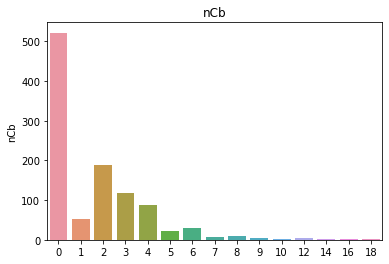

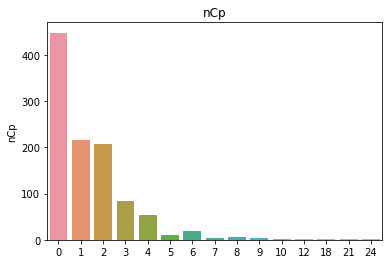

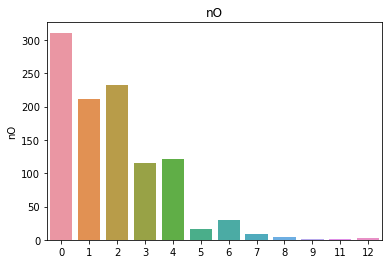

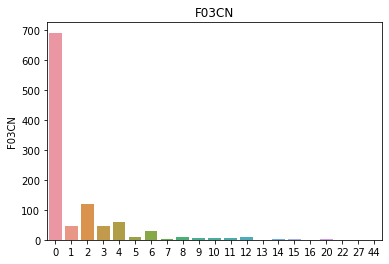

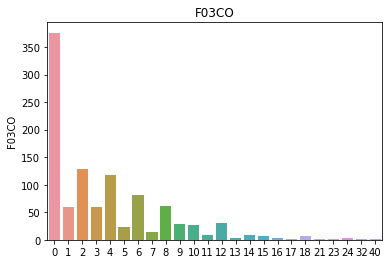

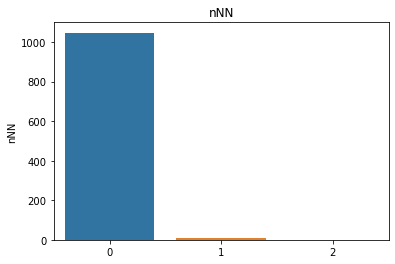

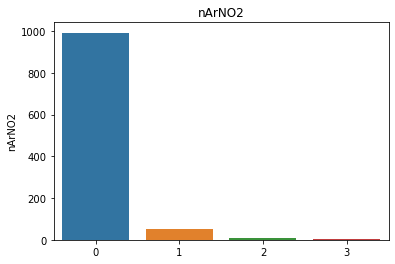

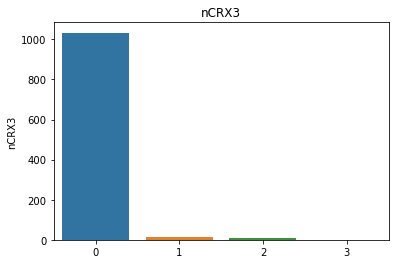

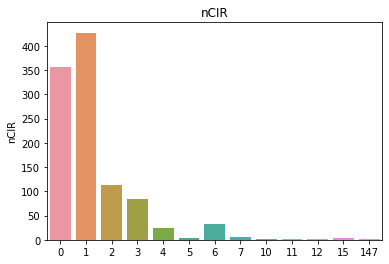

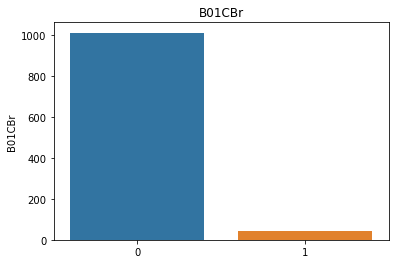

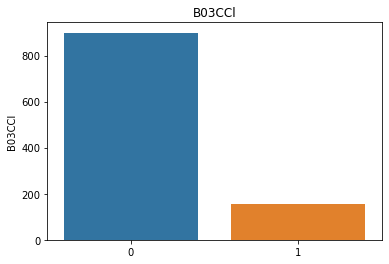

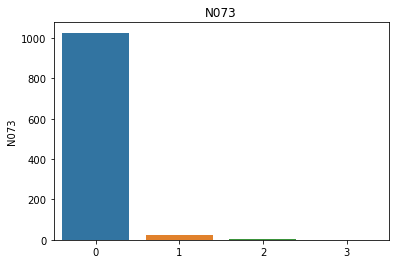

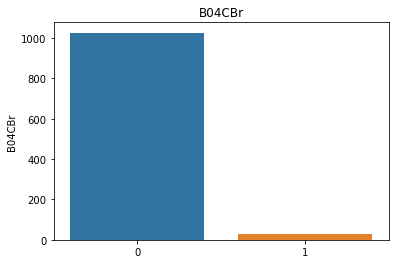

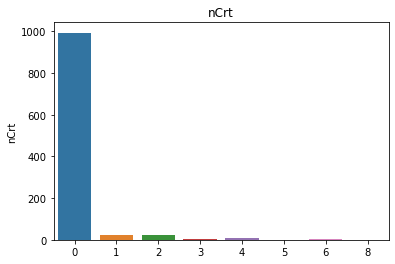

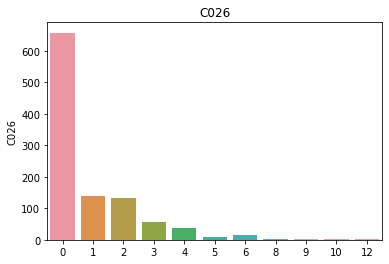

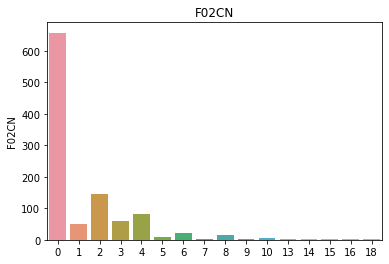

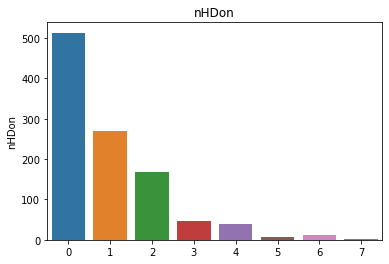

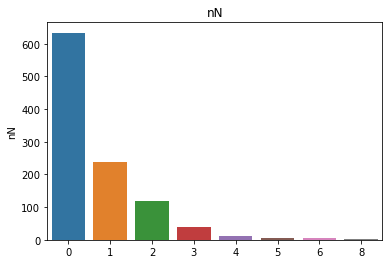

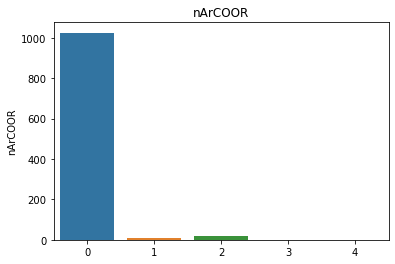

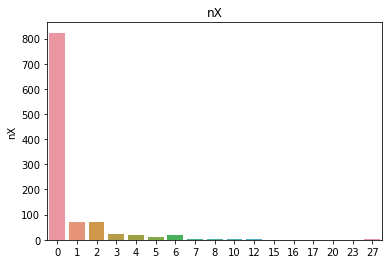

In [8]:
for i in qsar_cat.columns:
    sns.barplot(qsar_cat[i].value_counts().index, qsar_cat[i].value_counts()).set_title(i)
    plt.show()

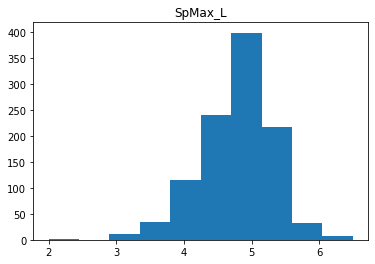

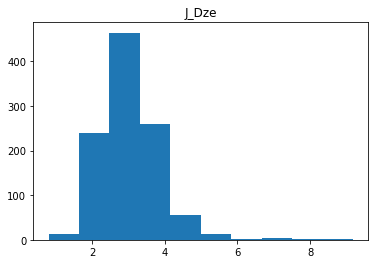

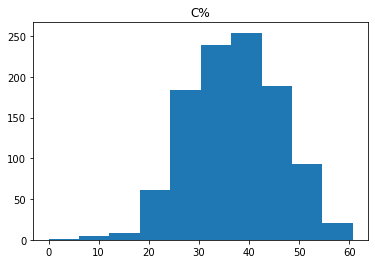

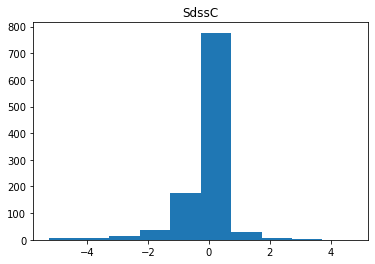

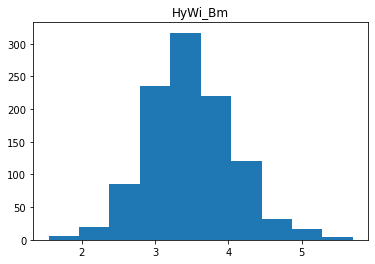

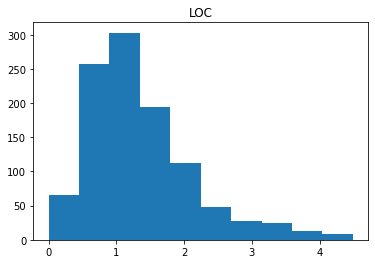

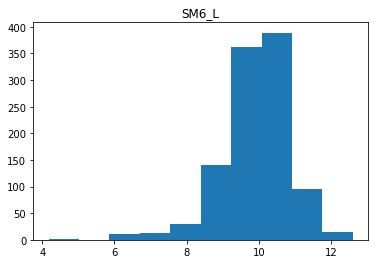

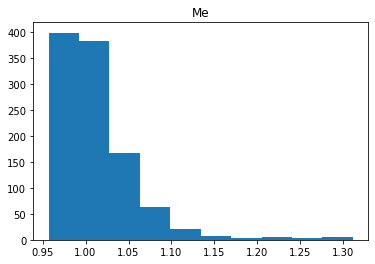

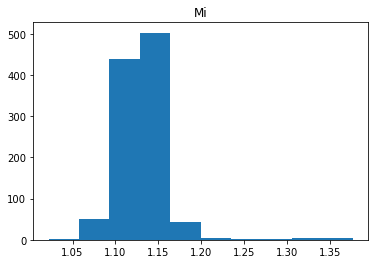

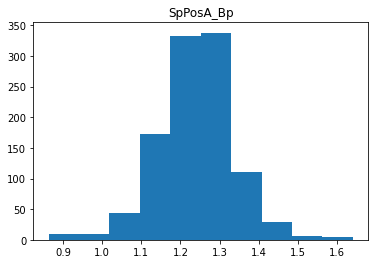

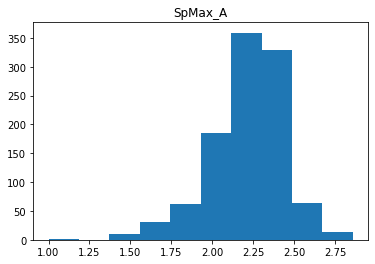

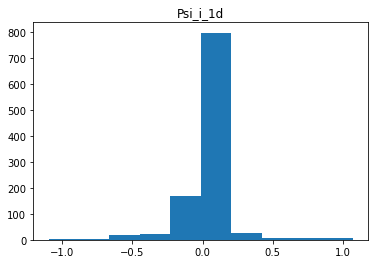

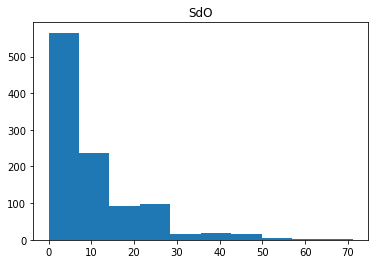

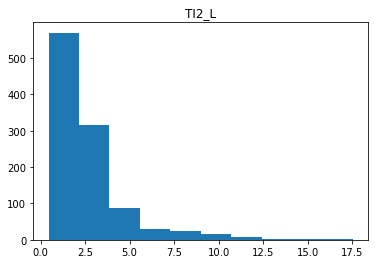

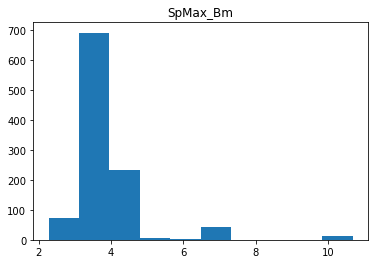

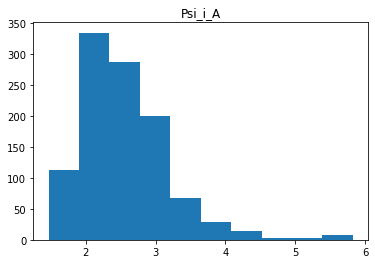

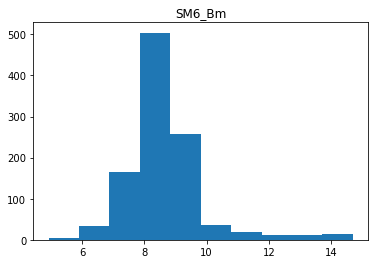

In [9]:
# distribution for all continuous variables using histogram
for i in qsar_con.columns:
    plt.hist(qsar_con[i])
    plt.title(i)
    plt.show()

# Feature Engineering

1. Declaring X and y variables
2. Use ANOVA (f_classif) to select the best features

In [10]:
y = qsar['experimental_class']
X = qsar.drop(columns='experimental_class')

In [11]:
# Using ANOVA feature selection
from sklearn.feature_selection import f_classif, SelectKBest
anova = SelectKBest(score_func=f_classif, k='all')  
anova.fit(X, y)
sortlist = []
col_name = []

# print all scores for all features in descending order
for i in range(len(anova.scores_)):
    sortlist.append([i+1, anova.scores_[i]])

sortlist.sort(key = lambda x:x[1], reverse = True)

for j in range(len(anova.scores_)):
    feature_num = sortlist[j][0]
    feature_value = sortlist[j][1]
    feature_name = X.columns[feature_num-1]
    col_name.append(feature_name)
    print('Feature %d (%s): %f' %(feature_num, feature_name, feature_value))

# print('Feature %d: %f' %(i+1,anova.scores_[i]))

Feature 1 (SpMax_L): 195.999690
Feature 27 (SpMax_A): 188.835426
Feature 22 (SpPosA_Bp): 169.390245
Feature 39 (SM6_Bm): 163.690168
Feature 13 (HyWi_Bm): 141.126544
Feature 15 (SM6_L): 140.752426
Feature 7 (nCb): 135.151782
Feature 33 (C026): 118.916644
Feature 3 (nHM): 103.463027
Feature 36 (SpMax_Bm): 96.411675
Feature 14 (LOC): 86.365580
Feature 34 (F02CN): 82.057578
Feature 38 (nN): 77.450978
Feature 25 (B03CCl): 71.466604
Feature 11 (F03CN): 65.691318
Feature 5 (F04CN): 61.339528
Feature 41 (nX): 50.773587
Feature 8 (C%): 44.611199
Feature 10 (nO): 34.129262
Feature 31 (TI2_L): 32.709270
Feature 6 (NssssC): 31.508325
Feature 20 (nArNO2): 25.457085
Feature 40 (nArCOOR): 24.076257
Feature 18 (Mi): 18.545029
Feature 23 (nCIR): 14.516704
Feature 37 (Psi_i_A): 14.086633
Feature 24 (B01CBr): 14.001863
Feature 12 (SdssC): 13.479685
Feature 32 (nCrt): 12.101096
Feature 4 (F01NN): 11.355478
Feature 21 (nCRX3): 9.843964
Feature 29 (B04CBr): 9.165594
Feature 26 (N073): 8.953312
Feature 17 (M

In [12]:
# Rearrange the dataframe based on the score and add experiment_class in the end
# col_name.append("experimental_class")
qsar_anova = qsar[col_name[:6] + ['experimental_class']]

# Model Preprocessing

1. Scaling data using MinMaxScaler
2. Checking the max and min values of each column according to their experimental class values (NRB, RB)

In [13]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
qsar_norm = pd.DataFrame(scaler.fit_transform(qsar_anova), columns=qsar_anova.columns)
qsar_norm['experimental_class'] = qsar['experimental_class']

Checking the minimum and maximum values for all the columns to make the boundaries for fuzzy rule.

In [14]:
# To set all the columns
pd.set_option('max_columns', None)

# The places after decimal point is 5.
pd.set_option('precision', 5)

In [15]:
qsar_norm.loc[qsar_norm['experimental_class'] == 0].min()

SpMax_L               0.0
SpMax_A               0.0
SpPosA_Bp             0.0
SM6_Bm                0.0
HyWi_Bm               0.0
SM6_L                 0.0
experimental_class    0.0
dtype: float64

In [16]:
qsar_norm.loc[qsar_norm['experimental_class'] == 0].max()

SpMax_L               1.0
SpMax_A               1.0
SpPosA_Bp             1.0
SM6_Bm                1.0
HyWi_Bm               1.0
SM6_L                 1.0
experimental_class    0.0
dtype: float64

In [17]:
qsar_norm.loc[qsar_norm['experimental_class'] == 1].min()

SpMax_L               0.00000
SpMax_A               0.00000
SpPosA_Bp             0.08612
SM6_Bm                0.00317
HyWi_Bm               0.00120
SM6_L                 0.00000
experimental_class    1.00000
dtype: float64

In [18]:
qsar_norm.loc[qsar_norm['experimental_class'] == 1].max()

SpMax_L               0.84831
SpMax_A               0.87144
SpPosA_Bp             0.85990
SM6_Bm                0.68435
HyWi_Bm               0.84171
SM6_L                 0.88773
experimental_class    1.00000
dtype: float64

In [19]:
# comparing biodegradable readiness with all the variables
# The columns are ranked and arranged based on ANOVA scores.
mean = pd.pivot_table(qsar_norm, index = 'experimental_class', values = qsar_norm.columns).reindex(col_name, axis=1)
mean

,SpMax_L,SpMax_A,SpPosA_Bp,SM6_Bm,HyWi_Bm,SM6_L,nCb,C026,nHM,SpMax_Bm,LOC,F02CN,nN,B03CCl,F03CN,F04CN,nX,C%,nO,TI2_L,NssssC,nArNO2,nArCOOR,Mi,nCIR,Psi_i_A,B01CBr,SdssC,nCrt,F01NN,nCRX3,B04CBr,N073,Me,nNN,nCp,SdO,nHDon,Psi_i_1d,F03CO,J_Dze
experimental_class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.65329,0.68776,0.51586,0.41270,0.49942,0.71024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.55142,0.58749,0.41829,0.31427,0.39730,0.63032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, we see the mean values for each of the columns for the variables to optimise our membership functions.

For example,

The mean of SpMax_L for NRB chemical:  0.65329

The mean of SpMax_L for RB chemical:  0.55142

Here, we see that higher SpMax_L means the chemical is more likely to be NRB.

# Model Building (Fuzzy Logic)

1. Set input and output objects, as well as the membership functions.
2. Set suitable rules by examining the values
3. Predict the experimental_class value using fuzzy system simulator
4. Compare the predicted value with original value and generate accuracy_score, confusion_matrix and classification_report

To set the membership functions of the Antecedent and Consequent, we will use minimum, mean and maximum values.

In [20]:
# These are the input objects
SpMax_L = ctrl.Antecedent(np.arange(0, 1, 0.0001), 'SpMax_L')
SpMax_A = ctrl.Antecedent(np.arange(0, 1, 0.0001), 'SpMax_A')
SpPosA_Bp = ctrl.Antecedent(np.arange(0, 1, 0.0001), 'SpPosA_Bp')
SM6_Bm = ctrl.Antecedent(np.arange(0, 1, 0.0001), 'SM6_Bm')
HyWi_Bm = ctrl.Antecedent(np.arange(0, 1, 0.0001), 'HyWi_Bm')
SM6_L = ctrl.Antecedent(np.arange(0, 1, 0.0001), 'SM6_L')

# This is output object (Experimental_class, 0 or 1)
eclass = ctrl.Consequent(np.arange(0, 1, 0.0001), 'eclass')

In [21]:
# NRB - min, mean, max
# RB - min, mean, max
SpMax_L['NRB'] = fuzz.trimf(SpMax_L.universe, [0, 0.65329, 1])
SpMax_L['RB'] = fuzz.trimf(SpMax_L.universe, [0, 0.55142, 0.84831])

SpMax_A['NRB'] = fuzz.trimf(SpMax_A.universe, [0, 0.68776, 1])
SpMax_A['RB'] = fuzz.trimf(SpMax_A.universe, [0, 0.58749, 0.87144])

SpPosA_Bp['NRB'] = fuzz.trimf(SpPosA_Bp.universe, [0, 0.51586, 1])
SpPosA_Bp['RB'] = fuzz.trimf(SpPosA_Bp.universe, [0.08612, 0.41829, 0.85990])

SM6_Bm['NRB'] = fuzz.trimf(SM6_Bm.universe, [0, 0.41270, 1])
SM6_Bm['RB'] = fuzz.trimf(SM6_Bm.universe, [0.00317, 0.31427, 0.68435])

HyWi_Bm['NRB'] = fuzz.trimf(HyWi_Bm.universe, [0, 0.49942, 1])
HyWi_Bm['RB'] = fuzz.trimf(HyWi_Bm.universe, [0.00120, 0.39730, 0.84171])

SM6_L['NRB'] = fuzz.trimf(SM6_L.universe, [0, 0.71024, 1])
SM6_L['RB'] = fuzz.trimf(SM6_L.universe, [0.00000, 0.63032, 0.88773])

eclass['RB'] = fuzz.smf(eclass.universe, 0, 1)
eclass['NRB'] = fuzz.zmf(eclass.universe, 0, 1)

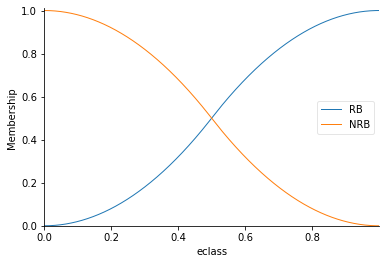

In [22]:
eclass.view()

In [23]:
rule1 = ctrl.Rule(SpMax_L['NRB'], eclass['NRB'])
rule2 = ctrl.Rule(SpMax_L['RB'], eclass['RB'])
rule3 = ctrl.Rule(SpMax_A['NRB'], eclass['NRB'])
rule4 = ctrl.Rule(SpMax_A['RB'], eclass['RB'])
rule5 = ctrl.Rule(SpPosA_Bp['NRB'], eclass['NRB'])
rule6 = ctrl.Rule(SpPosA_Bp['RB'], eclass['RB'])
rule7 = ctrl.Rule(SM6_Bm['NRB'], eclass['NRB'])
rule8 = ctrl.Rule(SM6_Bm['RB'], eclass['RB'])
#rule9 = ctrl.Rule(HyWi_Bm['NRB'], eclass['NRB'])
#rule10 = ctrl.Rule(HyWi_Bm['RB'], eclass['RB'])
#rule11 = ctrl.Rule(SM6_L['NRB'], eclass['NRB'])
#rule12 = ctrl.Rule(SM6_L['RB'], eclass['RB'])

qsar_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
qsar_sim = ctrl.ControlSystemSimulation(qsar_ctrl)

In [24]:
y_test = pd.DataFrame(columns = ['eclass'])
y_pred = pd.DataFrame(columns = ['eclass'])
qsar_norm = qsar_norm + 0.0001 # + 0.0001 since normalised dataset has 0
for i in range(len(qsar)):
    y_test = y_test.append({'eclass': qsar_anova.loc[i].experimental_class}, ignore_index=True)
    
    qsar_sim.input['SpMax_L'] = qsar_norm.loc[i].SpMax_L
    qsar_sim.input['SpMax_A'] = qsar_norm.loc[i].SpMax_A
    qsar_sim.input['SpPosA_Bp'] = qsar_norm.loc[i].SpPosA_Bp
    qsar_sim.input['SM6_Bm'] = qsar_norm.loc[i].SM6_Bm
    #qsar_sim.input['HyWi_Bm'] = qsar_norm.loc[i].HyWi_Bm
    #qsar_sim.input['SM6_L'] = qsar_norm.loc[i].SM6_L

    qsar_sim.compute()
    
    if(qsar_sim.output['eclass'] >= 0.5):
        y_pred = y_pred.append({'eclass': 1}, ignore_index=True)
    else:
        y_pred = y_pred.append({'eclass': 0}, ignore_index=True)

In [25]:
y_test['eclass'] = y_test['eclass'].astype(int)
y_pred['eclass'] = y_pred['eclass'].astype(int)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7374407582938388
[[542 157]
 [120 236]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       699
           1       0.60      0.66      0.63       356

    accuracy                           0.74      1055
   macro avg       0.71      0.72      0.71      1055
weighted avg       0.75      0.74      0.74      1055



## Reference
1. Gafa, C. (2020, May 13). Fuzzy Inference System implementation in Python - Towards Data Science. Medium. https://towardsdatascience.com/fuzzy-inference-system-implementation-in-python-8af88d1f0a6e
2. Fuzzy Control Systems: The Tipping Problem — skfuzzy v0.2 docs. (n.d.). SciKit. Retrieved July 3, 2021, from https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html
3. Spolaor, S., Fuchs, C., Cazzaniga, P., Kaymak, U., Besozzi, D., & Nobile, M. S. (2020). Simpful: A User-Friendly Python Library for Fuzzy Logic. Atlantis Press. https://www.atlantis-press.com/journals/ijcis/125945415/view
